In [1]:
import numpy as np
import xarray as xr
import pygmt

from pathlib import Path

from fdr_test import fdr_test

In [2]:
def colourbar_scale(da):
    abs_max = np.abs(da).max()
    return int(np.around(abs_max, -1)) * 1.2

In [3]:
path = Path("C:\\Users\\User\\Documents\\msc-research\\papers\\paper1\\figures\\data\\cov\\")

mean_fname = "mean_zw3_0_60_rank_cov.nc"
var_fname = "variance_zw3_0_60_rank_cov.nc"
var_corr_fname = "variance_zw3_0_60_rank_corr.nc"

ds_mean = xr.open_dataset(path / mean_fname)
ds_var = xr.open_dataset(path / var_fname) 
ds_var_corr = xr.open_dataset(path / var_corr_fname)
ds_fdr = fdr_test(ds_var_corr)

significant = ds_fdr.significant.astype('float64').to_dataframe().reset_index()
scale = colourbar_scale(ds_var['cov'])

In [4]:
scale

264.0

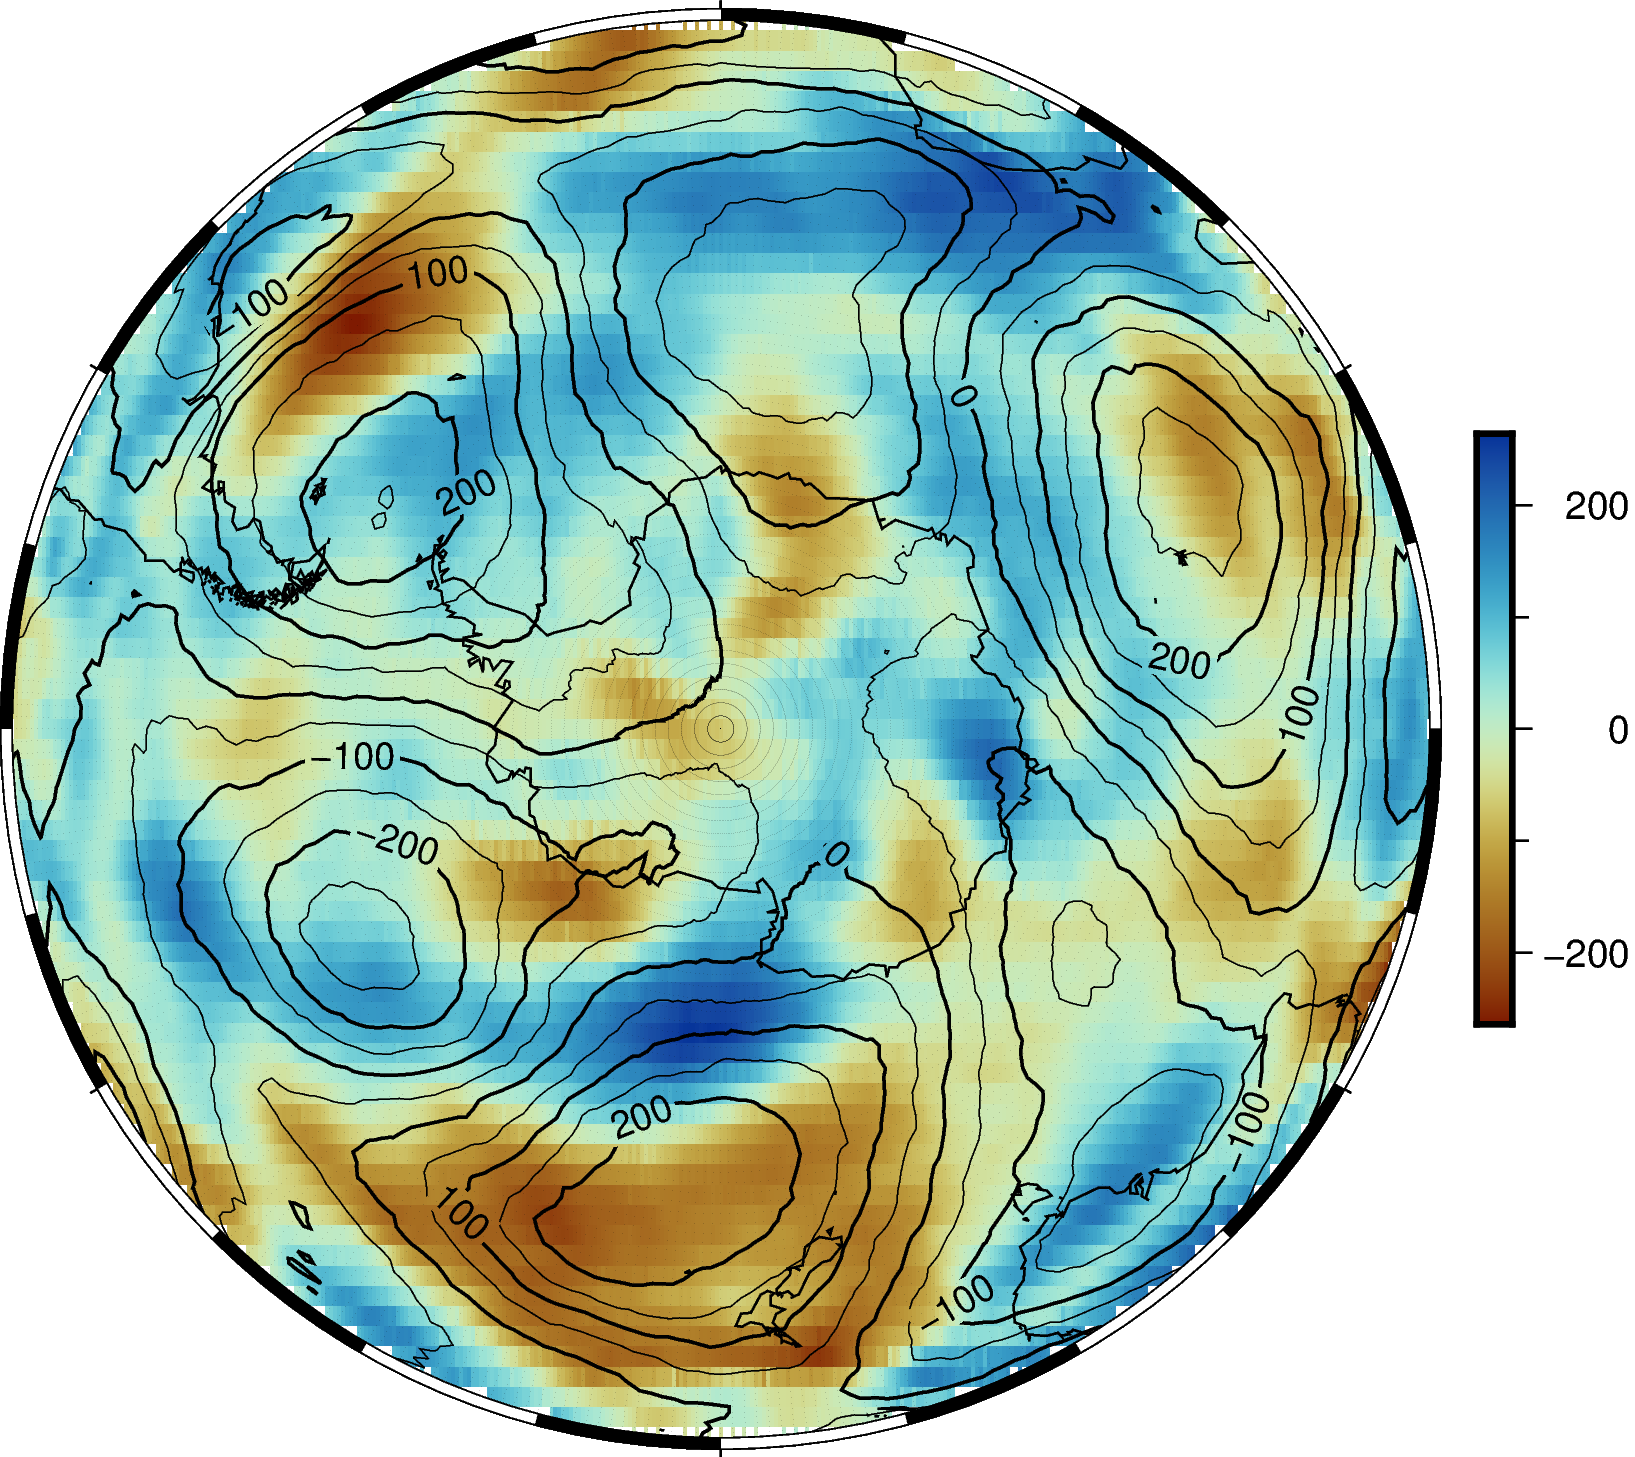

In [5]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="fancy+")
fig.basemap(region="g", projection="G0/-90/70/12c", frame="a")

fig.grdimage(
    grid=ds_var['cov'],
    cmap="roma",
    projection="G0/-90/70/12c",
    frame=('f'),
)
fig.grdcontour(
    grid=ds_mean['cov'],
    # interval=10,
    # annotation='10'
)
fig.plot(
    x=significant.lon,
    y=significant.lat,
    size=0.02 * (significant.significant),
    style="cc",
    color="black",
    transparency=50
)

fig.colorbar(
    cmap="roma",
    position="JMR+o0.4c/0c+w5c/0.3c",
    frame=["x+l "],
    scale=scale,
    )
fig.coast(shorelines="1/0.5p", resolution="c")

fig.show()

In [6]:
def open_datasets(season=None):
    if season == None:
        mean_fname = "mean_sam_rank_cov.nc"
        var_fname = "variance_sam_rank_cov.nc"
        var_corr_fname = "variance_sam_rank_corr.nc"
    else:
        mean_fname = f"{season}_mean_zw3_0_60_rank_cov.nc"
        var_fname = f"{season}_variance_zw3_0_60_rank_cov.nc"
        var_corr_fname = f"{season}_variance_zw3_0_60_rank_corr.nc"

    ds_mean = xr.open_dataset(path / mean_fname)
    ds_var = xr.open_dataset(path / var_fname) 
    ds_var_corr = xr.open_dataset(path / var_corr_fname)
    ds_fdr = fdr_test(ds_var_corr)

    significant = ds_fdr.significant.astype('float64').to_dataframe().reset_index()
    scale = colourbar_scale(ds_var['cov'])

    return ds_mean, ds_var, significant, scale

In [7]:
def cov_seasons(fig, season=None):
    ds_mean, ds_var, significant, scale = open_datasets(season)

    fig.grdimage(
        grid=ds_var['cov'],
        cmap="roma",
        projection="G0/-90/70/12c",
        frame=(f'x+l{season}'),
    )
    fig.grdcontour(
        grid=ds_mean['cov'],
        interval=10,
        annotation='10'
    )
    fig.plot(
        x=significant.lon,
        y=significant.lat,
        size=0.02 * (significant.significant),
        style="cc",
        color="black",
        transparency=50
    )

    fig.coast(shorelines="1/0.5p", resolution="c")

    return scale

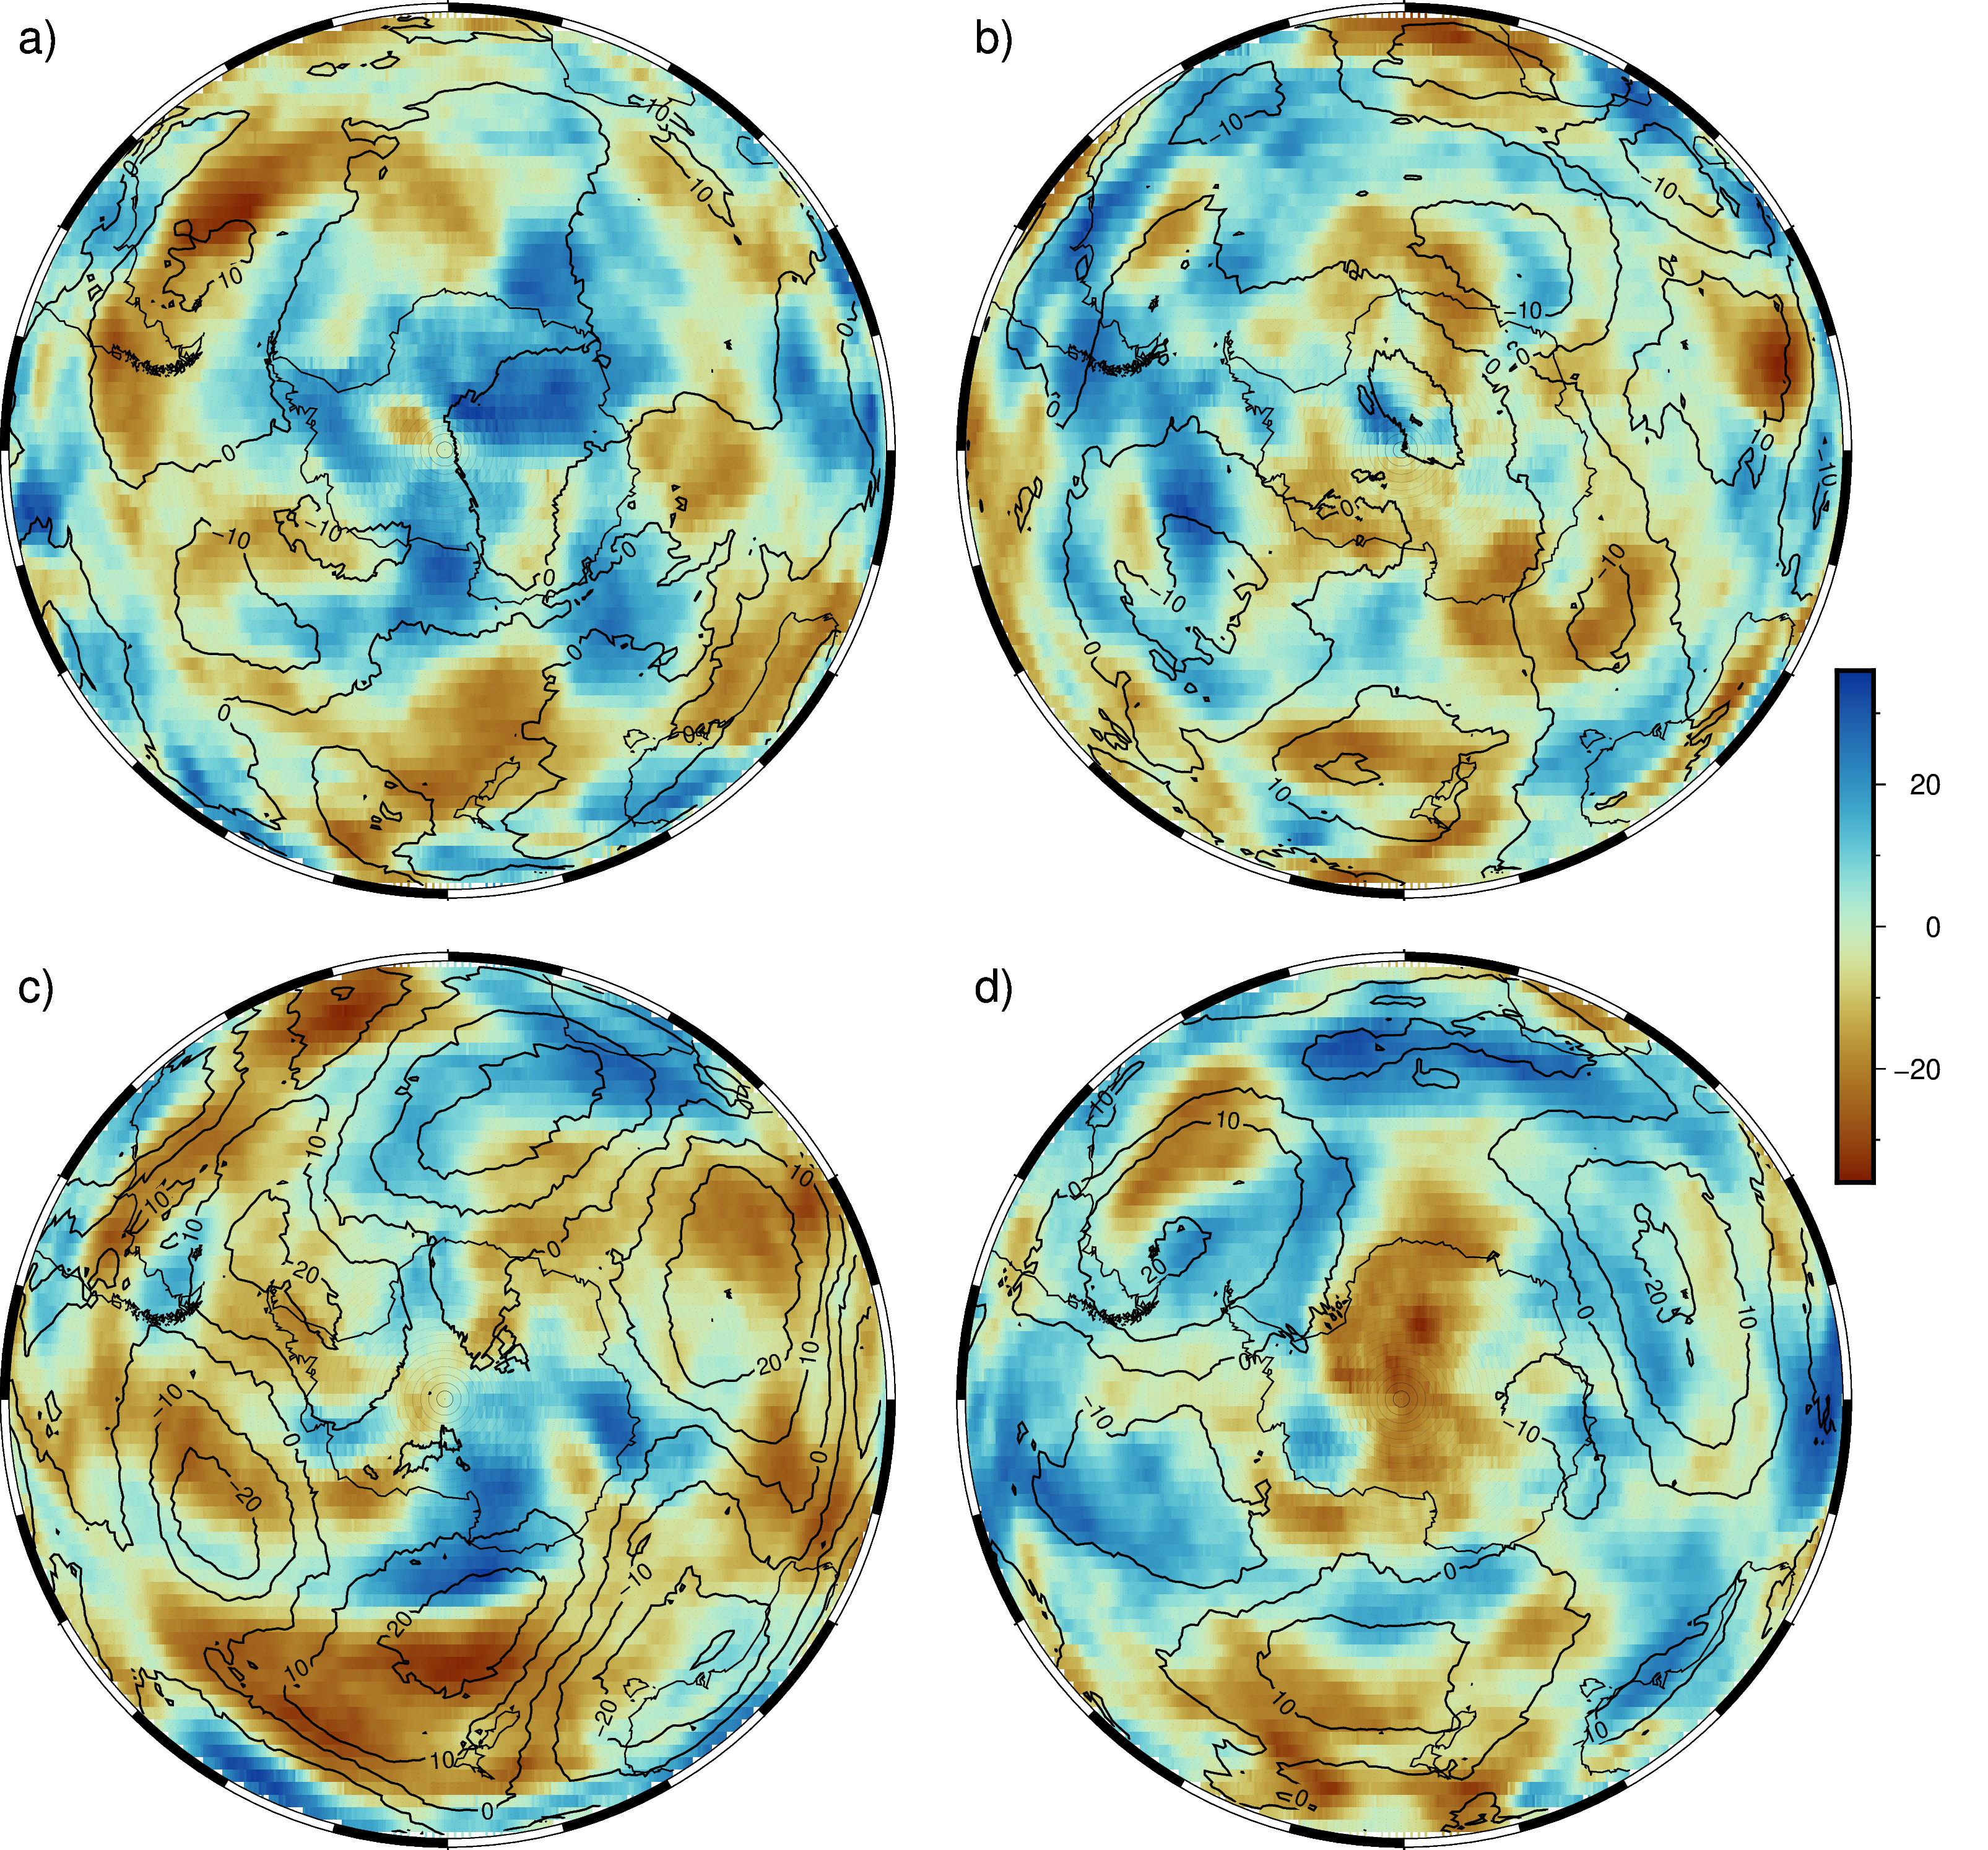

In [8]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
index = 0
scale = 0
fig = pygmt.Figure()
with fig.subplot(
    nrows=2,
    ncols=2,
    figsize=("25c", "25c"),  # width of 15 cm, height of 6 cm
    autolabel=True,
    margins=["0.3c", "0.2c"],  # horizontal 0.3 cm and vertical 0.2 cm margin
    frame="a",
):
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)

    for season in seasons:
        with fig.set_panel(panel=index):
            tmp_scale = cov_seasons(fig, season)
            if tmp_scale > scale:
                scale = tmp_scale
            
        index += 1
    
    fig.colorbar(
        cmap="roma",
        position="JTR+o0c/-3c+w7c/0.5c",
        frame=["x+l "],
        scale=scale,
        )

fig.show()